In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity, mean_squared_error
import copy

In [2]:
image = cv2.imread('img.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

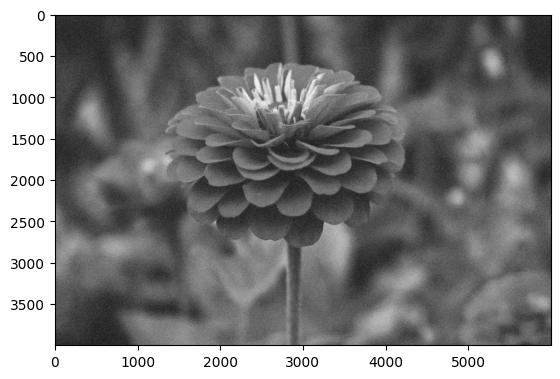

In [3]:
# 1. Гауссов шум
mean = 0
stddev = 100
noise_gauss = np.zeros(image_gray.shape, np.uint8)
cv2.randn(noise_gauss, mean, stddev)
image_noise_gauss = cv2.add(image_gray, noise_gauss)
plt.imshow(image_noise_gauss, cmap="gray")
plt.show()

In [4]:
# 2. Постоянный шум
noise = np.random.randint(0, 101, size=(image_gray.shape[0], image_gray.shape[1]), dtype=int)
zeros_pixel = np.where(noise == 0)
ones_pixel = np.where(noise == 100)

In [5]:
image_sp = copy.deepcopy(image_gray)
image_sp[zeros_pixel] = 0
image_sp[ones_pixel] = 255

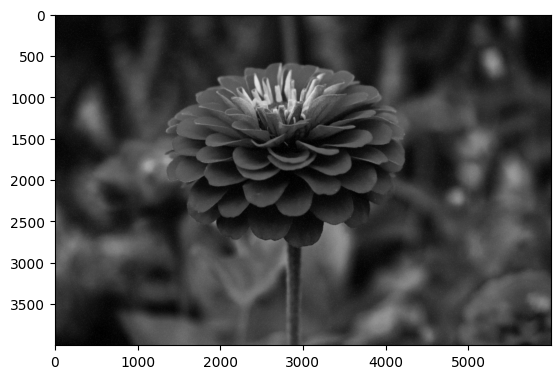

In [6]:
plt.imshow(image_sp, cmap="gray")
plt.show()

In [7]:
# Оценка зашумленных изображений
print("=== Оценка зашумленных изображений ===")
mse_gauss = mean_squared_error(image_gray, image_noise_gauss)
ssim_gauss = structural_similarity(image_gray, image_noise_gauss)
print(f"Гауссов шум: MSE = {mse_gauss:.2f}, SSIM = {ssim_gauss:.4f}")

=== Оценка зашумленных изображений ===
Гауссов шум: MSE = 4498.50, SSIM = 0.0259


In [8]:
mse_sp = mean_squared_error(image_gray, image_sp)
ssim_sp = structural_similarity(image_gray, image_sp)
print(f"Шум соль-перец: MSE = {mse_sp:.2f}, SSIM = {ssim_sp:.4f}")

Шум соль-перец: MSE = 446.00, SSIM = 0.5496


In [9]:
# Тестирование фильтров для гауссова шума
print("\n=== ФИЛЬТРАЦИЯ ГАУССОВА ШУМА ===")


=== ФИЛЬТРАЦИЯ ГАУССОВА ШУМА ===


In [10]:
# Медианный фильтр с разными параметрами
image_gauss_median3 = cv2.medianBlur(image_noise_gauss, 3)
image_gauss_median5 = cv2.medianBlur(image_noise_gauss, 5)
image_gauss_median7 = cv2.medianBlur(image_noise_gauss, 7)

In [11]:
# Гауссов фильтр с разными параметрами
image_gauss_gauss3 = cv2.GaussianBlur(image_noise_gauss, (3, 3), 0)
image_gauss_gauss5 = cv2.GaussianBlur(image_noise_gauss, (5, 5), 0)
image_gauss_gauss7 = cv2.GaussianBlur(image_noise_gauss, (7, 7), 0)

In [12]:
# Билатеральный фильтр с разными параметрами
image_gauss_bilat1 = cv2.bilateralFilter(image_noise_gauss, 5, 50, 50)
image_gauss_bilat2 = cv2.bilateralFilter(image_noise_gauss, 9, 75, 75)
image_gauss_bilat3 = cv2.bilateralFilter(image_noise_gauss, 15, 100, 100)

In [13]:
# Фильтр нелокальных средних с разными параметрами
image_gauss_nlm1 = cv2.fastNlMeansDenoising(image_noise_gauss, h=10)
image_gauss_nlm2 = cv2.fastNlMeansDenoising(image_noise_gauss, h=20)
image_gauss_nlm3 = cv2.fastNlMeansDenoising(image_noise_gauss, h=30)

In [14]:
# Оценка результатов для гауссова шума
filters_gauss = {
    'Медианный 3x3': image_gauss_median3,
    'Медианный 5x5': image_gauss_median5,
    'Медианный 7x7': image_gauss_median7,
    'Гауссов 3x3': image_gauss_gauss3,
    'Гауссов 5x5': image_gauss_gauss5,
    'Гауссов 7x7': image_gauss_gauss7,
    'Билатеральный (5,50,50)': image_gauss_bilat1,
    'Билатеральный (9,75,75)': image_gauss_bilat2,
    'Билатеральный (15,100,100)': image_gauss_bilat3,
    'NLM h=10': image_gauss_nlm1,
    'NLM h=20': image_gauss_nlm2,
    'NLM h=30': image_gauss_nlm3
}

In [15]:
best_ssim_gauss = 0
best_filter_gauss = ""

In [16]:
for name, filtered in filters_gauss.items():
    mse = mean_squared_error(image_gray, filtered)
    ssim_val = structural_similarity(image_gray, filtered)
    print(f"{name:25}: MSE = {mse:6.2f}, SSIM = {ssim_val:.4f}")

    if ssim_val > best_ssim_gauss:
        best_ssim_gauss = ssim_val
        best_filter_gauss = name

Медианный 3x3            : MSE = 844.07, SSIM = 0.1536
Медианный 5x5            : MSE = 333.25, SSIM = 0.3658
Медианный 7x7            : MSE = 188.66, SSIM = 0.5445
Гауссов 3x3              : MSE = 1926.51, SSIM = 0.1412
Гауссов 5x5              : MSE = 1729.21, SSIM = 0.2304
Гауссов 7x7              : MSE = 1627.56, SSIM = 0.3475
Билатеральный (5,50,50)  : MSE = 3048.23, SSIM = 0.0427
Билатеральный (9,75,75)  : MSE = 1786.39, SSIM = 0.1045
Билатеральный (15,100,100): MSE = 1359.92, SSIM = 0.2079
NLM h=10                 : MSE = 4498.36, SSIM = 0.0261
NLM h=20                 : MSE = 4486.27, SSIM = 0.0289
NLM h=30                 : MSE = 2778.29, SSIM = 0.0833


In [17]:
print(f"\nЛучший фильтр для гауссова шума: {best_filter_gauss} (SSIM = {best_ssim_gauss:.4f})")


Лучший фильтр для гауссова шума: Медианный 7x7 (SSIM = 0.5445)


In [18]:
# Тестирование фильтров для шума соль-перец
print("\n=== ФИЛЬТРАЦИЯ ШУМА СОЛЬ-ПЕРЕЦ ===")


=== ФИЛЬТРАЦИЯ ШУМА СОЛЬ-ПЕРЕЦ ===


In [19]:
# Медианный фильтр
image_sp_median3 = cv2.medianBlur(image_sp, 3)
image_sp_median5 = cv2.medianBlur(image_sp, 5)
image_sp_median7 = cv2.medianBlur(image_sp, 7)

In [20]:
# Гауссов фильтр
image_sp_gauss3 = cv2.GaussianBlur(image_sp, (3, 3), 0)
image_sp_gauss5 = cv2.GaussianBlur(image_sp, (5, 5), 0)
image_sp_gauss7 = cv2.GaussianBlur(image_sp, (7, 7), 0)

In [21]:
# Билатеральный фильтр
image_sp_bilat1 = cv2.bilateralFilter(image_sp, 5, 50, 50)
image_sp_bilat2 = cv2.bilateralFilter(image_sp, 9, 75, 75)
image_sp_bilat3 = cv2.bilateralFilter(image_sp, 15, 100, 100)

In [22]:
# Фильтр нелокальных средних
image_sp_nlm1 = cv2.fastNlMeansDenoising(image_sp, h=10)
image_sp_nlm2 = cv2.fastNlMeansDenoising(image_sp, h=20)
image_sp_nlm3 = cv2.fastNlMeansDenoising(image_sp, h=30)

In [23]:
# Оценка результатов для шума соль-перец
filters_sp = {
    'Медианный 3x3': image_sp_median3,
    'Медианный 5x5': image_sp_median5,
    'Медианный 7x7': image_sp_median7,
    'Гауссов 3x3': image_sp_gauss3,
    'Гауссов 5x5': image_sp_gauss5,
    'Гауссов 7x7': image_sp_gauss7,
    'Билатеральный (5,50,50)': image_sp_bilat1,
    'Билатеральный (9,75,75)': image_sp_bilat2,
    'Билатеральный (15,100,100)': image_sp_bilat3,
    'NLM h=10': image_sp_nlm1,
    'NLM h=20': image_sp_nlm2,
    'NLM h=30': image_sp_nlm3
}

In [24]:
best_ssim_sp = 0
best_filter_sp = ""

In [25]:
for name, filtered in filters_sp.items():
    mse = mean_squared_error(image_gray, filtered)
    ssim_val = structural_similarity(image_gray, filtered)
    print(f"{name:25}: MSE = {mse:6.2f}, SSIM = {ssim_val:.4f}")

    if ssim_val > best_ssim_sp:
        best_ssim_sp = ssim_val
        best_filter_sp = name

Медианный 3x3            : MSE =   7.71, SSIM = 0.9116
Медианный 5x5            : MSE =  12.04, SSIM = 0.8562
Медианный 7x7            : MSE =  12.15, SSIM = 0.8544
Гауссов 3x3              : MSE =  69.97, SSIM = 0.6620
Гауссов 5x5              : MSE =  43.42, SSIM = 0.7124
Гауссов 7x7              : MSE =  30.19, SSIM = 0.7616
Билатеральный (5,50,50)  : MSE = 409.92, SSIM = 0.5544
Билатеральный (9,75,75)  : MSE = 172.03, SSIM = 0.6293
Билатеральный (15,100,100): MSE =  24.90, SSIM = 0.7827
NLM h=10                 : MSE = 420.32, SSIM = 0.5544
NLM h=20                 : MSE =  64.80, SSIM = 0.7503
NLM h=30                 : MSE =  15.63, SSIM = 0.8372


In [26]:
print(f"\nЛучший фильтр для шума соль-перец: {best_filter_sp} (SSIM = {best_ssim_sp:.4f})")


Лучший фильтр для шума соль-перец: Медианный 3x3 (SSIM = 0.9116)


In [27]:
# Визуализация лучших результатов
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

(np.float64(-0.5), np.float64(5999.5), np.float64(3999.5), np.float64(-0.5))

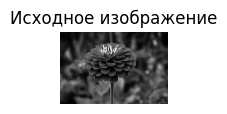

In [28]:
# Исходное изображение
plt.subplot(2, 4, 1)
plt.imshow(image_gray, cmap="gray")
plt.title("Исходное изображение")
plt.axis('off')

(np.float64(-0.5), np.float64(5999.5), np.float64(3999.5), np.float64(-0.5))

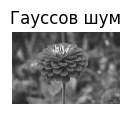

In [29]:
# Зашумленные изображения
plt.subplot(2, 4, 2)
plt.imshow(image_noise_gauss, cmap="gray")
plt.title("Гауссов шум")
plt.axis('off')

(np.float64(-0.5), np.float64(5999.5), np.float64(3999.5), np.float64(-0.5))

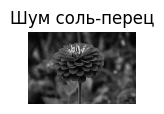

In [30]:
plt.subplot(2, 4, 3)
plt.imshow(image_sp, cmap="gray")
plt.title("Шум соль-перец")
plt.axis('off')

(np.float64(-0.5), np.float64(5999.5), np.float64(3999.5), np.float64(-0.5))

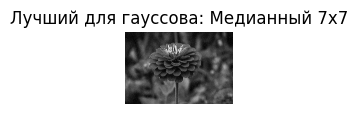

In [31]:
# Лучшие результаты для гауссова шума
plt.subplot(2, 4, 5)
best_gauss_img = filters_gauss[best_filter_gauss]
plt.imshow(best_gauss_img, cmap="gray")
plt.title(f"Лучший для гауссова: {best_filter_gauss}")
plt.axis('off')

(np.float64(-0.5), np.float64(5999.5), np.float64(3999.5), np.float64(-0.5))

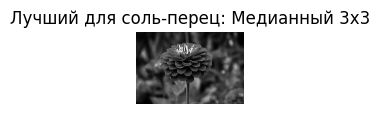

In [32]:
# Лучшие результаты для шума соль-перец
plt.subplot(2, 4, 6)
best_sp_img = filters_sp[best_filter_sp]
plt.imshow(best_sp_img, cmap="gray")
plt.title(f"Лучший для соль-перец: {best_filter_sp}")
plt.axis('off')

(np.float64(-0.5), np.float64(5999.5), np.float64(3999.5), np.float64(-0.5))

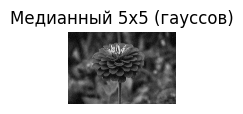

In [33]:
# Сравнение медианного фильтра для обоих типов шума
plt.subplot(2, 4, 7)
plt.imshow(image_gauss_median5, cmap="gray")
plt.title("Медианный 5x5 (гауссов)")
plt.axis('off')

(np.float64(-0.5), np.float64(5999.5), np.float64(3999.5), np.float64(-0.5))

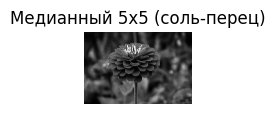

In [34]:
plt.subplot(2, 4, 8)
plt.imshow(image_sp_median5, cmap="gray")
plt.title("Медианный 5x5 (соль-перец)")
plt.axis('off')

In [35]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>